# Goals

- The main goal of this project is to make a prediction of stock prices of PETR4.
- Additionally, I would like to work with 2-month predictions in order to figure out a way to find out nice opportunities for options on this stock. PETR4 options are amidst the most traded in the world.
- An extension to this project would be to build a bot to trade this stock.

## How

- First I'm going to make use of time series with the daily stock prices, probably LSTM or bidirectional LSTM, which are the most relevant. 
- Maybe I could try to put another variable like international price of oil or other oil stocks.

# Getting Data

In [1]:
#!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
papel = yf.Ticker('PETR4.SA')
papel

yfinance.Ticker object <PETR4.SA>

In [3]:
dados= papel.history(start= '2007-01-01', end='2022-12-29')

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3966 entries, 2007-01-02 00:00:00-02:00 to 2022-12-28 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3966 non-null   float64
 1   High          3966 non-null   float64
 2   Low           3966 non-null   float64
 3   Close         3966 non-null   float64
 4   Volume        3966 non-null   int64  
 5   Dividends     3966 non-null   float64
 6   Stock Splits  3966 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 247.9 KB


# Exploratory Analysis

In [5]:
# Close price through the years

<AxesSubplot:xlabel='Date'>

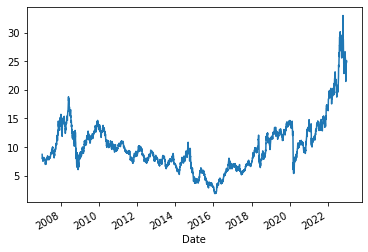

In [6]:
dados['Close'].plot()

In [7]:
# dividend distribution

In [8]:
div=dados[['Dividends']]
div=div[div['Dividends']>0]
div.head()

,Dividends
Date,
2007-01-02 00:00:00-02:00,0.2250
2007-04-03 00:00:00-03:00,0.1750
2007-08-20 00:00:00-03:00,0.2517
2007-10-08 00:00:00-03:00,0.2565
2008-01-14 00:00:00-02:00,0.1553


In [9]:
div.index

DatetimeIndex(['2007-01-02 00:00:00-02:00', '2007-04-03 00:00:00-03:00',
               '2007-08-20 00:00:00-03:00', '2007-10-08 00:00:00-03:00',
               '2008-01-14 00:00:00-02:00', '2008-04-07 00:00:00-03:00',
               '2008-12-29 00:00:00-02:00', '2009-04-09 00:00:00-03:00',
               '2009-07-06 00:00:00-03:00', '2009-10-01 00:00:00-03:00',
               '2009-12-21 00:00:00-02:00', '2010-04-23 00:00:00-03:00',
               '2010-05-24 00:00:00-03:00', '2010-08-02 00:00:00-03:00',
               '2010-11-03 00:00:00-02:00', '2010-12-22 00:00:00-02:00',
               '2011-03-22 00:00:00-03:00', '2011-04-29 00:00:00-03:00',
               '2011-05-12 00:00:00-03:00', '2011-08-03 00:00:00-03:00',
               '2011-11-14 00:00:00-02:00', '2012-01-03 00:00:00-02:00',
               '2012-03-20 00:00:00-03:00', '2012-05-14 00:00:00-03:00',
               '2013-04-30 00:00:00-03:00', '2014-04-03 00:00:00-03:00',
               '2018-05-22 00:00:00-03:00', '2018-0

In [10]:
#for date in div.index:
    #print(date)

In [11]:
div.index[0]

Timestamp('2007-01-02 00:00:00-0200', tz='America/Sao_Paulo')

In [12]:
dados.index.get_loc(div.index[2])

157

In [13]:
dados.index.get_loc('2007-08-20 00:00:00-03:00')

157

In [14]:
dados.iloc[157]

Open            8.221955e+00
High            8.241330e+00
Low             8.031730e+00
Close           8.149740e+00
Volume          2.473800e+07
Dividends       2.517000e-01
Stock Splits    0.000000e+00
Name: 2007-08-20 00:00:00-03:00, dtype: float64

In [15]:
locations_div=[]
for data in div.index:
    locations_div.append(dados.index.get_loc(data))

In [16]:
close_div=[]
for loc in locations_div:
    close_div.append(dados.iloc[loc]['Close'])

In [17]:
div['Price']=close_div

In [18]:
div['DY']=div['Dividends']/div['Price']

In [19]:
div

,Dividends,Price,DY
Date,,,
2007-01-02 00:00:00-02:00,0.225000,8.701064,0.025859
2007-04-03 00:00:00-03:00,0.175000,7.908744,0.022127
2007-08-20 00:00:00-03:00,0.251700,8.149740,0.030884
2007-10-08 00:00:00-03:00,0.256500,10.987377,0.023345
2008-01-14 00:00:00-02:00,0.155300,14.462688,0.010738
2008-04-07 00:00:00-03:00,0.102600,14.037206,0.007309
2008-12-29 00:00:00-02:00,0.042600,8.069036,0.005279
2009-04-09 00:00:00-03:00,0.351600,11.181715,0.031444
2009-07-06 00:00:00-03:00,0.300000,10.998055,0.027278


<AxesSubplot:xlabel='Date'>

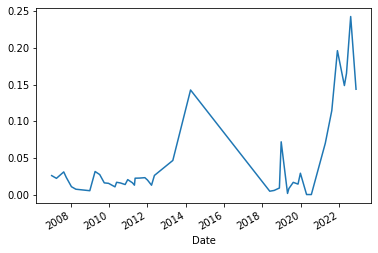

In [20]:
div['DY'].plot()

In [21]:
#!git add .
#!git commit -m 'petro analysis'
#!git push origin main

# Model example

## Previous time series project

- for information, i copied this from a previous rnn project

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras.callbacks import EarlyStopping

def initialize_model():
    model = Sequential()
    model.add(SimpleRNN(units=20,activation='tanh',input_shape=(3966, 1)))
    model.add(Dense(10,activation='tanh'))
    model.add(Dense(1,activation='linear'))
    
    return model

model=initialize_model()
model.summary()

2023-01-12 10:41:19.484069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-12 10:41:19.484144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


2023-01-12 10:41:27.458575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-12 10:41:27.458706: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-12 10:41:27.458916: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-23E8V41): /proc/driver/nvidia/version does not exist
2023-01-12 10:41:27.459227: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
'''
def compile_model(model):
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
    return model
model=compile_model(model)

model = compile_model(initialize_model())

model.fit(X_train,y_train, batch_size=32, epochs=30,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)]
)
'''

"\ndef compile_model(model):\n    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])\n    return model\nmodel=compile_model(model)\n\nmodel = compile_model(initialize_model())\n\nmodel.fit(X_train,y_train, batch_size=32, epochs=30,verbose=1,validation_split=0.2,\n          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)]\n)\n"

## LSTM for stocks

- Found this on the internet. Very good base example of a LSTM stock prediction.

In [24]:
#https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [25]:
import math
from sklearn.preprocessing import MinMaxScaler 
import numpy as np

close_prices = dados['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]


#train set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#test set
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
#model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 32, epochs=3)

Epoch 1/3
98/98 [==============================] - 17s 127ms/step - loss: 0.0024
Epoch 2/3
98/98 [==============================] - 11s 116ms/step - loss: 2.6413e-04
Epoch 3/3
98/98 [==============================] - 12s 117ms/step - loss: 2.5152e-04


In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.4298680535180572

/tmp/ipykernel_475/2686380006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


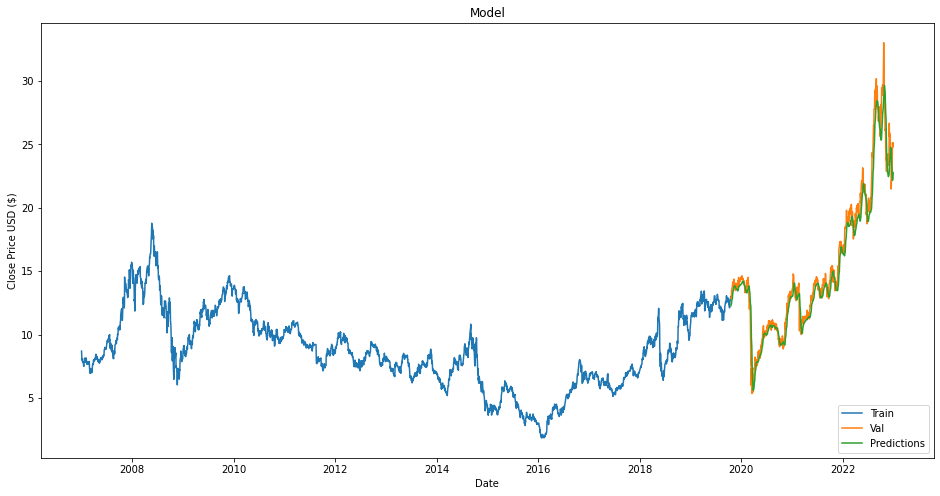

In [29]:
import matplotlib.pyplot as plt

data = dados.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/tmp/ipykernel_475/1626216995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


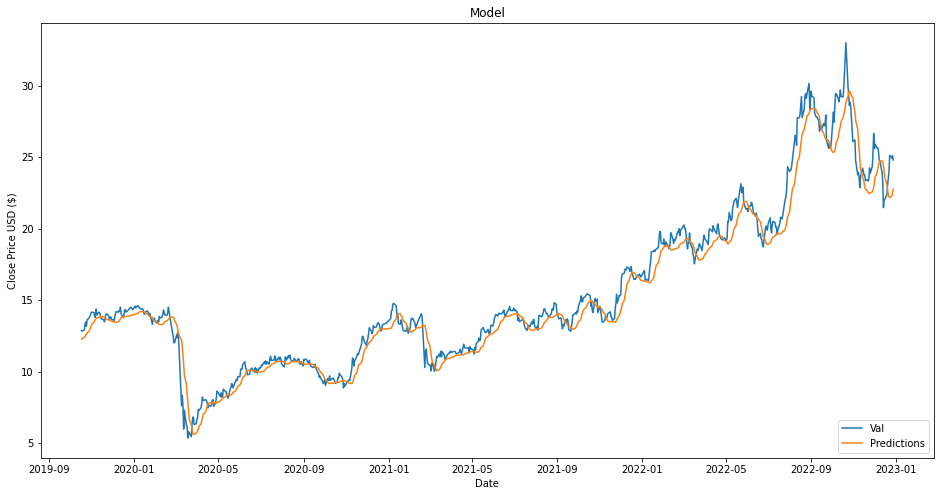

In [30]:
data = dados.filter(['Close'])
#train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
#there is something wrong in here. There is no way it predicts with this much accuracy data it has never seen.
#there is data leakage somewhere

In [32]:
#um cara falou que da merda no scaling. Usar scaling só com x train

In [33]:
#ele também só preve a proxima data, eu quero prever mais coisas, tipo 1 semana ou a data de 60 dias

# Fixing Data leaking

In [34]:
import math
from sklearn.preprocessing import MinMaxScaler 
import numpy as np

close_prices = dados['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

values=values.reshape(-1,1)
train_values=values[0: training_data_len]

scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_values)

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
test_values=values[training_data_len-60:]

test_data = scaler.transform(test_values)
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
x_test.shape

(793, 60, 1)

In [37]:
y_test.shape

(793, 1)

In [38]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 32, epochs=3)

Epoch 1/3
98/98 [==============================] - 18s 140ms/step - loss: 0.0062
Epoch 2/3
98/98 [==============================] - 12s 119ms/step - loss: 8.9274e-04
Epoch 3/3
98/98 [==============================] - 12s 118ms/step - loss: 8.2907e-04


In [39]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3701809694306998

/tmp/ipykernel_475/4044787029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


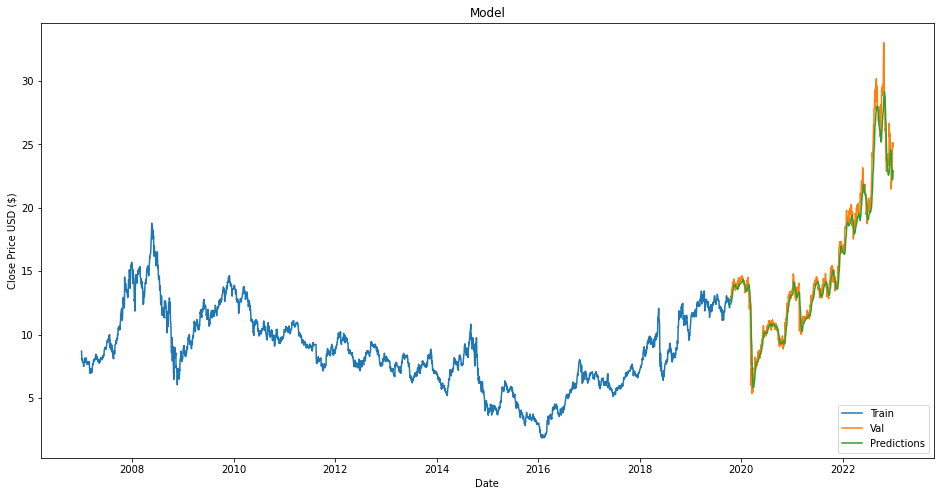

In [40]:
data = dados.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/tmp/ipykernel_475/1626216995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


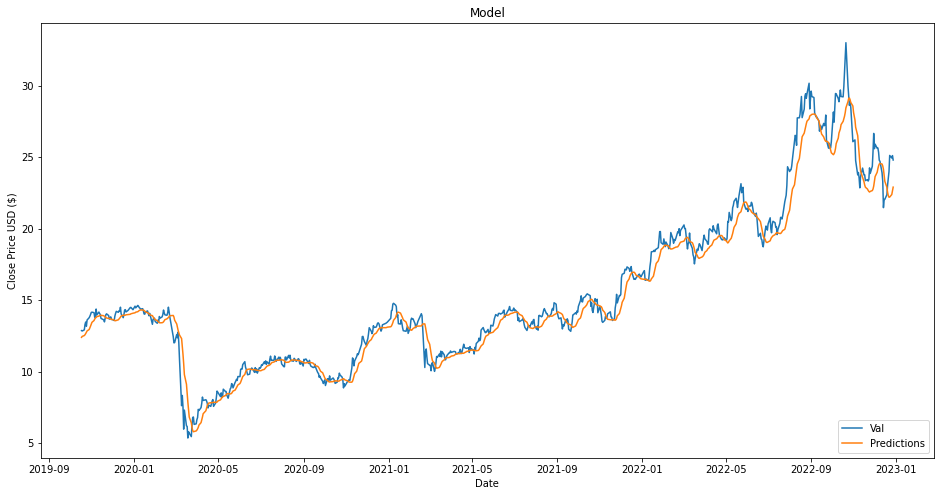

In [41]:
data = dados.filter(['Close'])
#train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
#looks the same to me. But I'd say its better to not leak data.

In [43]:
#!git add .
#!git commit -m 'first lstm pred'
#!git push origin main

# Baseline model

- I've figured out how to start building up a model with LSTM
- Now, let's find a baseline to compare how good this actually is
- An idea of baseline is to say that the price on d+1 is going to be the same price on d+0

In [44]:
baseline = pd.DataFrame(y_test).rename(columns={0:'d+0'})
baseline

,d+0
0,12.872649
1,12.844728
2,12.923843
3,13.296153
4,13.473003
...,...
788,23.990000
789,25.120001
790,24.940001
791,25.110001


In [45]:
baseline['d-1']=pd.DataFrame(dados['Close'].values[-794:-1])

In [46]:
baseline

,d+0,d-1
0,12.872649,12.998303
1,12.844728,12.872649
2,12.923843,12.844728
3,13.296153,12.923843
4,13.473003,13.296153
...,...,...
788,23.990000,23.570000
789,25.120001,23.990000
790,24.940001,25.120001
791,25.110001,24.940001


## calculate metrics to beat

In [47]:
rmse_base = np.sqrt(np.mean((baseline['d+0']-baseline['d-1'])**2))
rmse_base

0.4619846356177066

In [48]:
#!git add .
#!git commit -m 'baseline'
#!git push origin main

# Tuning the model

In [52]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=32, epochs=30,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])

Epoch 1/30
78/78 [==============================] - 20s 187ms/step - loss: 0.0118 - val_loss: 0.0011
Epoch 2/30
78/78 [==============================] - 11s 140ms/step - loss: 9.2286e-04 - val_loss: 9.8158e-04
Epoch 3/30
78/78 [==============================] - 10s 131ms/step - loss: 8.4345e-04 - val_loss: 8.9050e-04
Epoch 4/30
78/78 [==============================] - 10s 129ms/step - loss: 7.4385e-04 - val_loss: 7.7596e-04
Epoch 5/30
78/78 [==============================] - 10s 132ms/step - loss: 7.6381e-04 - val_loss: 8.0452e-04
Epoch 6/30
78/78 [==============================] - 10s 129ms/step - loss: 6.8358e-04 - val_loss: 6.4221e-04
Epoch 7/30
78/78 [==============================] - 10s 133ms/step - loss: 6.4111e-04 - val_loss: 6.1409e-04
Epoch 8/30
78/78 [==============================] - 10s 131ms/step - loss: 5.8217e-04 - val_loss: 5.6382e-04
Epoch 9/30
78/78 [==============================] - 10s 130ms/step - loss: 5.8851e-04 - val_loss: 6.2490e-04
Epoch 10/30
78/78 [========

In [53]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.35588165249529885

In [54]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=32, epochs=100,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])

Epoch 1/100
78/78 [==============================] - 15s 144ms/step - loss: 0.0089 - val_loss: 0.0014
Epoch 2/100
78/78 [==============================] - 10s 129ms/step - loss: 8.8703e-04 - val_loss: 0.0010
Epoch 3/100
78/78 [==============================] - 10s 129ms/step - loss: 8.5167e-04 - val_loss: 9.0434e-04
Epoch 4/100
78/78 [==============================] - 11s 138ms/step - loss: 7.8797e-04 - val_loss: 9.0318e-04
Epoch 5/100
78/78 [==============================] - 10s 131ms/step - loss: 7.2772e-04 - val_loss: 7.4551e-04
Epoch 6/100
78/78 [==============================] - 10s 131ms/step - loss: 6.3948e-04 - val_loss: 7.5316e-04
Epoch 7/100
78/78 [==============================] - 10s 130ms/step - loss: 6.7882e-04 - val_loss: 6.0381e-04
Epoch 8/100
78/78 [==============================] - 10s 130ms/step - loss: 5.8213e-04 - val_loss: 5.6239e-04
Epoch 9/100
78/78 [==============================] - 10s 131ms/step - loss: 5.4426e-04 - val_loss: 5.0237e-04
Epoch 10/100
78/78 [==

In [55]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.11015652648136866

In [56]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=16, epochs=30,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])

Epoch 1/30
156/156 [==============================] - 22s 114ms/step - loss: 0.0042 - val_loss: 9.1746e-04
Epoch 2/30
156/156 [==============================] - 17s 107ms/step - loss: 8.2186e-04 - val_loss: 0.0012
Epoch 3/30
156/156 [==============================] - 17s 108ms/step - loss: 8.4441e-04 - val_loss: 6.1654e-04
Epoch 4/30
156/156 [==============================] - 17s 107ms/step - loss: 6.5513e-04 - val_loss: 5.4560e-04
Epoch 5/30
156/156 [==============================] - 17s 107ms/step - loss: 5.9395e-04 - val_loss: 5.2214e-04
Epoch 6/30
156/156 [==============================] - 17s 106ms/step - loss: 5.2290e-04 - val_loss: 5.4951e-04
Epoch 7/30
156/156 [==============================] - 17s 108ms/step - loss: 4.7423e-04 - val_loss: 7.7003e-04
Epoch 8/30
156/156 [==============================] - 17s 107ms/step - loss: 5.4118e-04 - val_loss: 3.5692e-04
Epoch 9/30
156/156 [==============================] - 17s 107ms/step - loss: 3.8944e-04 - val_loss: 3.1891e-04
Epoch 10/

In [57]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.12226908384325526

In [49]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=16, epochs=100,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])

Epoch 1/100
156/156 [==============================] - 22s 115ms/step - loss: 0.0058 - val_loss: 9.9980e-04
Epoch 2/100
156/156 [==============================] - 16s 105ms/step - loss: 9.0083e-04 - val_loss: 9.0247e-04
Epoch 3/100
156/156 [==============================] - 16s 105ms/step - loss: 8.2640e-04 - val_loss: 8.6524e-04
Epoch 4/100
156/156 [==============================] - 17s 108ms/step - loss: 7.3999e-04 - val_loss: 9.7815e-04
Epoch 5/100
156/156 [==============================] - 17s 108ms/step - loss: 7.5139e-04 - val_loss: 5.6287e-04
Epoch 6/100
156/156 [==============================] - 17s 109ms/step - loss: 5.9002e-04 - val_loss: 5.2592e-04
Epoch 7/100
156/156 [==============================] - 17s 106ms/step - loss: 5.5462e-04 - val_loss: 4.9390e-04
Epoch 8/100
156/156 [==============================] - 17s 109ms/step - loss: 4.6327e-04 - val_loss: 3.8415e-04
Epoch 9/100
156/156 [==============================] - 16s 106ms/step - loss: 4.4826e-04 - val_loss: 3.7604e

In [50]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.17183584884316444

## saving best model

In [ ]:
#saving best model

In [52]:
import pickle
filename = 'model1.sav'
#pickle.dump(model, open(filename, 'wb'))

In [53]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred=loaded_model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
rmse

0.000299976271909543

## plotting prediction

In [54]:
predict = pd.DataFrame(y_test).rename(columns={0:'actual'})
predict['pred']=pd.DataFrame(y_pred)
predict

,actual,pred
0,12.872649,13.046600
1,12.844728,12.904234
2,12.923843,12.879878
3,13.296153,12.970884
4,13.473003,13.368046
...,...,...
788,23.990000,23.657974
789,25.120001,24.065161
790,24.940001,25.578205
791,25.110001,24.542374


/tmp/ipykernel_475/4035412964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = y_pred


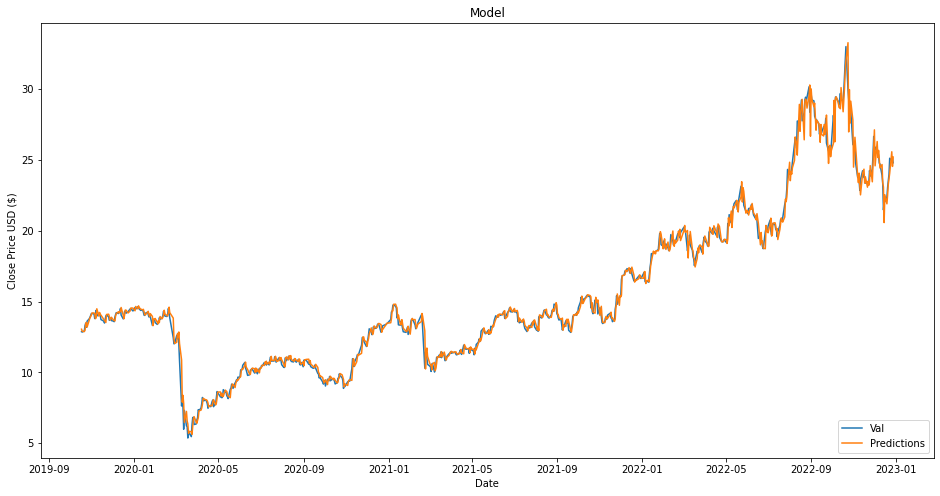

In [55]:
data = dados.filter(['Close'])
#train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [77]:
#!git add .
#!git commit -m 'Nice model'
#!git push origin main

# Building up on that model

In [56]:
#There are two things I could do right now. Change the output and increase the input data
#Increasing the input data from 60 days to something else should be easier, so lets start by that.

## Increasing input data

In [57]:
#Currently the model takes the 60 previous days to make a prediction of the following day.
#This might not be enough if we think about a prediction of a week or a prediction of 2 months.
#So lets start by making it 90 days.

In [67]:
close_prices = dados['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

In [68]:
print(values.shape)
values

(3966,)


array([ 8.70106411,  8.43650627,  8.2480278 , ..., 24.94000053,
       25.11000061, 24.79999924])

In [69]:
values=values.reshape(-1,1)
print(values.shape)
values

(3966, 1)


array([[ 8.70106411],
       [ 8.43650627],
       [ 8.2480278 ],
       ...,
       [24.94000053],
       [25.11000061],
       [24.79999924]])

In [73]:
train_values=values[0: training_data_len]
#test_values=values[training_data_len:]

In [77]:
train_values.shape

(3173, 1)

In [76]:
test_values.shape

(793, 1)

In [72]:
#Scaling data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_values)

In [85]:
#training data
x_train = []
y_train = []

for i in range(90, len(train_data)):
    #cada resultado i tem 90 dias pra trás como features
    x_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i, 0])

In [88]:
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape #(3173-90)

(3083, 90)

In [89]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #expand dims pra entrar no modelo
x_train.shape

(3083, 90, 1)

In [ ]:
#test data

In [95]:
test_values=values[training_data_len-90:] #vou precisar de 90 dias antes pra fazer o modelo

test_data = scaler.transform(test_values)

x_test = []
y_test = values[training_data_len:] #shape diferente pra passar no scaler

for i in range(90, len(test_data)):
  x_test.append(test_data[i-90:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [93]:
y_test.shape

(793, 1)

In [94]:
y_train.shape

(3083,)

In [124]:
y_train_2=values[90:training_data_len]
y_train_2.shape #both work

(3083, 1)

In [97]:
x_test.shape

(793, 90, 1)

In [ ]:
#lets run a model with more input data

In [101]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=16, epochs=100,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])

Epoch 1/100
155/155 [==============================] - 31s 173ms/step - loss: 0.0035 - val_loss: 9.2399e-04
Epoch 2/100
155/155 [==============================] - 25s 160ms/step - loss: 8.0585e-04 - val_loss: 7.3247e-04
Epoch 3/100
155/155 [==============================] - 25s 160ms/step - loss: 7.1075e-04 - val_loss: 0.0021
Epoch 4/100
155/155 [==============================] - 25s 160ms/step - loss: 6.3230e-04 - val_loss: 9.1949e-04
Epoch 5/100
155/155 [==============================] - 24s 153ms/step - loss: 5.2162e-04 - val_loss: 4.5046e-04
Epoch 6/100
155/155 [==============================] - 24s 156ms/step - loss: 4.7804e-04 - val_loss: 6.3618e-04
Epoch 7/100
155/155 [==============================] - 24s 153ms/step - loss: 4.6510e-04 - val_loss: 3.5192e-04
Epoch 8/100
155/155 [==============================] - 24s 154ms/step - loss: 3.8855e-04 - val_loss: 3.1697e-04
Epoch 9/100
155/155 [==============================] - 24s 152ms/step - loss: 3.8481e-04 - val_loss: 3.8900e-04


In [102]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.13690735142288113

In [103]:
#ok, so making it 90 days or whatever days is pretty forward.
#lets work on changing the output

In [105]:
!git add .
!git commit -m '90 days input'
!git push origin main

[main 7f415b1] 90 days input
 2 files changed, 3228 insertions(+), 2719 deletions(-)
 copy Petro.ipynb => .ipynb_checkpoints/Petro-checkpoint.ipynb (99%)
 rewrite Petro.ipynb (75%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 567.78 KiB | 9.62 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/LucasGama1207/petr4_prediction.git
   7f210b9..7f415b1  main -> main


## Changing output

In [104]:
#there is two ways to change the output. One is a single day in a week or a month.
#the other is the full range of weeks. I could try that, but I think its more complicated and useless.
#maybe just to practice my lstm skills.

In [145]:
#changing the output is basically changing the ytrain and ytest

#training data
x_train = []
y_train = []

for i in range(90, (len(train_data)-6)):
    #cada resultado i tem 90 dias pra trás como features
    x_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i+6, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #expand dims pra entrar no modelo
print(x_train.shape)
print(y_train.shape)

(3077, 90, 1)
(3077,)


In [147]:
test_values=values[training_data_len-90:] #vou precisar de 90 dias antes pra fazer o modelo

test_data = scaler.transform(test_values)

x_test = []
y_test = values[training_data_len:-6] 

for i in range(90, (len(test_data)-6)):
  x_test.append(test_data[i-90:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
print(y_test.shape)

(787, 90, 1)
(787, 1)


In [149]:
values[89+7]

array([8.2066946])

In [137]:
y_train.reshape(-1,1)

array([[0.36495454],
       [0.37133591],
       [0.37401221],
       ...,
       [0.64145511],
       [0.64942761],
       [0.65849953]])

In [146]:
scaler.inverse_transform(y_train.reshape(-1,1))

array([[ 8.2066946 ],
       [ 8.02896786],
       [ 8.13699627],
       ...,
       [12.70976353],
       [12.84472752],
       [12.99830341]])

In [150]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=16, epochs=100,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])


Epoch 1/100
154/154 [==============================] - 28s 155ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 2/100
154/154 [==============================] - 23s 148ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 3/100
154/154 [==============================] - 25s 164ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 4/100
154/154 [==============================] - 23s 152ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/100
154/154 [==============================] - 23s 149ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/100
154/154 [==============================] - 24s 156ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 7/100
154/154 [==============================] - 24s 154ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 8/100
154/154 [==============================] - 24s 155ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9/100
154/154 [==============================] - 23s 150ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 10/100
154/154 [==============================] - 24s 155m

In [151]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.2691821015926298

In [152]:
!git add .
!git commit -m '7 day prediction'
!git push origin main

[main 8d43596] 7 day prediction
 1 file changed, 340 insertions(+), 45 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.59 KiB | 139.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/LucasGama1207/petr4_prediction.git
   7f415b1..8d43596  main -> main


## How many days do I really want?

- we could go for a monthly rate of the stock, that would be interesting
- but the main goal was to predict the price of the options of petr4, which happen every two months.


- how many days are there between options?
https://www.b3.com.br/data/files/30/C3/24/BA/4FA6161025668616790D8AA8/PREGOES.pdf
- 46 pregoes

In [153]:
#media de pregoes
preg = (248+249+247+248+248+245+246+249+246+248+248)/10
preg

272.2

In [155]:
round(preg/12)

23

- Increasing the input as well for a year seems correct.
- 272 Pregoes

# Prediction 60 days

In [156]:
close_prices = dados['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

values=values.reshape(-1,1)
train_values=values[0: training_data_len]

#Scaling data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_values)

#training data
x_train = []
y_train = []

for i in range(272, len(train_data)-45):
    #cada resultado i tem 272 dias pra trás como features
    x_train.append(train_data[i-272:i, 0])
    y_train.append(train_data[i-45, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #expand dims pra entrar no modelo
print(x_train.shape)
print(y_train.shape)



test_values=values[training_data_len-272:] #vou precisar de 90 dias antes pra fazer o modelo

test_data = scaler.transform(test_values)

x_test = []
y_test = values[training_data_len:-45] 

for i in range(272, (len(test_data)-45)):
  x_test.append(test_data[i-272:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
print(y_test.shape)

(2856, 272, 1)
(2856,)
(748, 272, 1)
(748, 1)


In [157]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=16, epochs=100,verbose=1,validation_split=0.2,
          callbacks=[EarlyStopping(patience=5,restore_best_weights=True)])

Epoch 1/100
143/143 [==============================] - 68s 446ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 2/100
143/143 [==============================] - 60s 422ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 3/100
143/143 [==============================] - 60s 423ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 4/100
143/143 [==============================] - 61s 428ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 5/100
143/143 [==============================] - 61s 427ms/step - loss: 9.9879e-04 - val_loss: 9.1939e-04
Epoch 6/100
143/143 [==============================] - 60s 421ms/step - loss: 0.0010 - val_loss: 5.4194e-04
Epoch 7/100
143/143 [==============================] - 60s 423ms/step - loss: 7.8558e-04 - val_loss: 4.5475e-04
Epoch 8/100
143/143 [==============================] - 60s 422ms/step - loss: 8.0520e-04 - val_loss: 5.4121e-04
Epoch 9/100
143/143 [==============================] - 62s 437ms/step - loss: 7.2406e-04 - val_loss: 0.0012
Epoch 10/100
143/143 [==========

In [158]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.7613305720415982

In [159]:
predictions

array([[11.6248665],
       [11.589758 ],
       [11.565989 ],
       [11.554823 ],
       [11.555156 ],
       [11.568396 ],
       [11.598104 ],
       [11.638948 ],
       [11.691768 ],
       [11.755523 ],
       [11.828521 ],
       [11.908824 ],
       [11.995548 ],
       [12.087354 ],
       [12.185148 ],
       [12.284707 ],
       [12.379116 ],
       [12.472734 ],
       [12.558369 ],
       [12.636154 ],
       [12.7038965],
       [12.762302 ],
       [12.8094225],
       [12.84519  ],
       [12.863577 ],
       [12.867086 ],
       [12.857423 ],
       [12.837587 ],
       [12.807634 ],
       [12.769967 ],
       [12.729795 ],
       [12.689289 ],
       [12.651741 ],
       [12.616615 ],
       [12.586901 ],
       [12.564608 ],
       [12.553436 ],
       [12.55372  ],
       [12.568119 ],
       [12.594824 ],
       [12.641198 ],
       [12.706244 ],
       [12.785137 ],
       [12.874367 ],
       [12.973374 ],
       [13.081018 ],
       [13.191736 ],
       [13.30

In [160]:
pred1 = pd.DataFrame(y_test).rename(columns={0:'actual'})
pred1['pred']=pd.DataFrame(predictions)
pred1

,actual,pred
0,12.872649,11.624866
1,12.844728,11.589758
2,12.923843,11.565989
3,13.296153,11.554823
4,13.473003,11.555156
...,...,...
743,29.931961,15.419077
744,30.990646,15.461911
745,31.909344,15.497470
746,33.003029,15.524173


/tmp/ipykernel_475/2387409059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


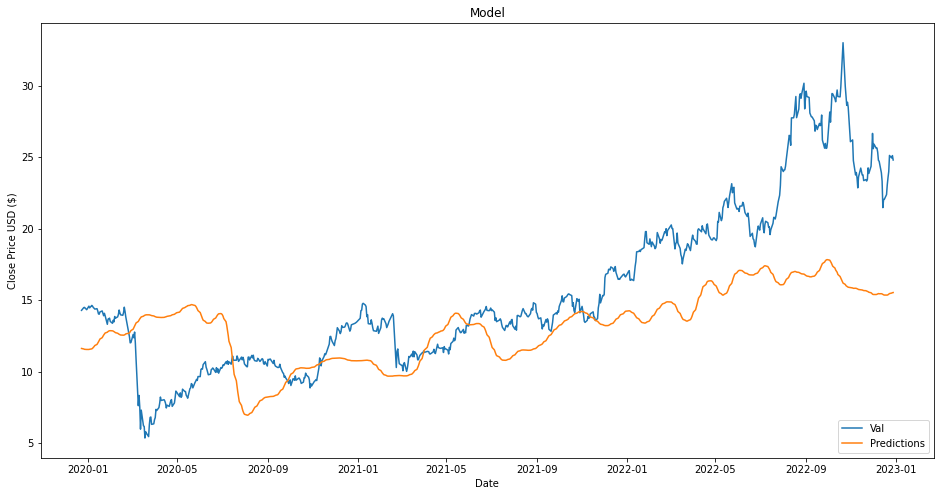

In [164]:
data = dados.filter(['Close'])
#train = data[:training_data_len]
validation = data[training_data_len+45:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [165]:
#It sucks, but I can work on that later
#to do: check that the values are correct for x_test, y_test
#improve the model

In [ ]:
!git add .
!git commit -m '60days'
!git push o